<a href="https://colab.research.google.com/github/devpathak0212/A-Lightweight-Deep-Learning-Framework-for-Land-Cover-Classification-from-Sentinel-2-Imagery/blob/main/Models/EfficientNetB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

In [ ]:

! mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download pranjallk1995/rgbeurosat

Dataset URL: https://www.kaggle.com/datasets/pranjallk1995/rgbeurosat
License(s): unknown
 98% 88.0M/89.8M [00:06<00:00, 21.8MB/s]
100% 89.8M/89.8M [00:06<00:00, 15.6MB/s]


In [ ]:
!unzip '/content/rgbeurosat.zip'

Streaming output truncated to the last 5000 lines.
  inflating: RBG/train/SeaLake/SeaLake_1112.jpg  
  inflating: RBG/train/SeaLake/SeaLake_1113.jpg  
  inflating: RBG/train/SeaLake/SeaLake_1115.jpg  
  inflating: RBG/train/SeaLake/SeaLake_1116.jpg  
  inflating: RBG/train/SeaLake/SeaLake_1118.jpg  
  inflating: RBG/train/SeaLake/SeaLake_1119.jpg  
  inflating: RBG/train/SeaLake/SeaLake_112.jpg  
  inflating: RBG/train/SeaLake/SeaLake_1120.jpg  
  inflating: RBG/train/SeaLake/SeaLake_1121.jpg  
  inflating: RBG/train/SeaLake/SeaLake_1122.jpg  
  inflating: RBG/train/SeaLake/SeaLake_1123.jpg  
  inflating: RBG/train/SeaLake/SeaLake_1124.jpg  
  inflating: RBG/train/SeaLake/SeaLake_1126.jpg  
  inflating: RBG/train/SeaLake/SeaLake_1127.jpg  
  inflating: RBG/train/SeaLake/SeaLake_1128.jpg  
  inflating: RBG/train/SeaLake/SeaLake_1129.jpg  
  inflating: RBG/train/SeaLake/SeaLake_113.jpg  
  inflating: RBG/train/SeaLake/SeaLake_1130.jpg  
  inflating: RBG/train/SeaLake/SeaLake_1131.jpg  
 

In [ ]:
# Essential and common packages
import os
import glob
import time

# Read and visualize the raster data
# import rasterio
# from rasterio.plot import show

# Plots and bars
import matplotlib.pyplot as plt
import seaborn as sns

# Computation library
import numpy as np

from tensorflow.keras.models import Sequential

# Tensorflow for building the resnet50 model
import tensorflow.python.keras as k
import tensorflow as tf
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.initializers import RandomUniform, GlorotUniform

from tensorflow.keras.optimizers import Adam

#Tensorflow for DenseNet121 model
from tensorflow.keras.applications import DenseNet121

#Tensorflow for EficientNetB2 model
from tensorflow.keras.applications import EfficientNetB2

#Tensorflow for ResNet50 model
from tensorflow.keras.applications import ResNet50

from tensorflow.keras.models import Model

# Sklearn for confusion matrix and classification report
import itertools
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# For visualization of plots without plt.show()
%matplotlib inline

In [ ]:
dataset_url = r'/content/RBG/train'
batch_size = 32
img_height = 64
img_width = 64
validation_split=0.2
rescale=1.0/255

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=validation_split, rescale=rescale)
dataset = tf.keras.preprocessing.image_dataset_from_directory(dataset_url, image_size=(img_height, img_width), batch_size=batch_size)

Found 21600 files belonging to 10 classes.


In [ ]:
train_dataset = datagen.flow_from_directory(batch_size=batch_size,
                                           directory=dataset_url,
                                           shuffle=True,
                                           target_size=(img_height, img_width),
                                           subset="training",
                                           class_mode='categorical')

Found 17280 images belonging to 10 classes.


In [ ]:
test_dataset = datagen.flow_from_directory(batch_size=batch_size,
                                           directory=dataset_url,
                                           shuffle=True,
                                           target_size=(img_height, img_width),
                                           subset="validation",
                                           class_mode='categorical')

Found 4320 images belonging to 10 classes.


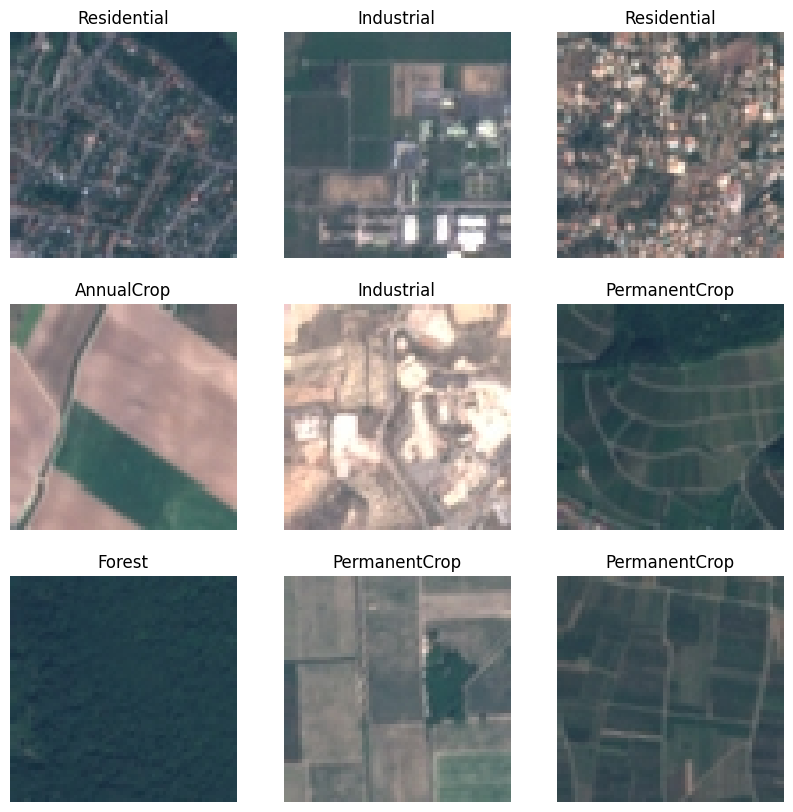

In [ ]:
class_names = dataset.class_names
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
model = DenseNet121(weights='imagenet', include_top=False, input_shape=(64,64,3))

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
for layer in model.layers:
        layer.trainable=False

In [ ]:
efficientnet_model = Sequential()
efficientnet_model.add(model)
efficientnet_model.add(Flatten())
efficientnet_model.add(Dense(512, activation='relu'))
efficientnet_model.add(Dense(256, activation='relu'))
efficientnet_model.add(Dense(10, activation='softmax'))

In [ ]:
efficientnet_model.build(input_shape=(None, 64, 64, 3))
efficientnet_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',  # Use this for one-hot encoded labels
    metrics=['accuracy']
)

In [ ]:
epochs=100
history = efficientnet_model.fit(
  train_dataset,
  validation_data=test_dataset,
  epochs=epochs,
  batch_size=32
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


540/540 ━━━━━━━━━━━━━━━━━━━━ 55s 51ms/step - accuracy: 0.7585 - loss: 0.7873 - val_accuracy: 0.8606 - val_loss: 0.4085
Epoch 2/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.8891 - loss: 0.3263 - val_accuracy: 0.8655 - val_loss: 0.3865
Epoch 3/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.9117 - loss: 0.2533 - val_accuracy: 0.8838 - val_loss: 0.3333
Epoch 4/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.9309 - loss: 0.2035 - val_accuracy: 0.8750 - val_loss: 0.3823
Epoch 5/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.9421 - loss: 0.1689 - val_accuracy: 0.8843 - val_loss: 0.3829
Epoch 6/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.9512 - loss: 0.1388 - val_accuracy: 0.8850 - val_loss: 0.3632
Epoch 7/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.9627 - loss: 0.1119 - val_accuracy: 0.8898 - val_loss: 0.3936
Epoch 8/100
540/540 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.9672 - loss: 0.0959 - val_

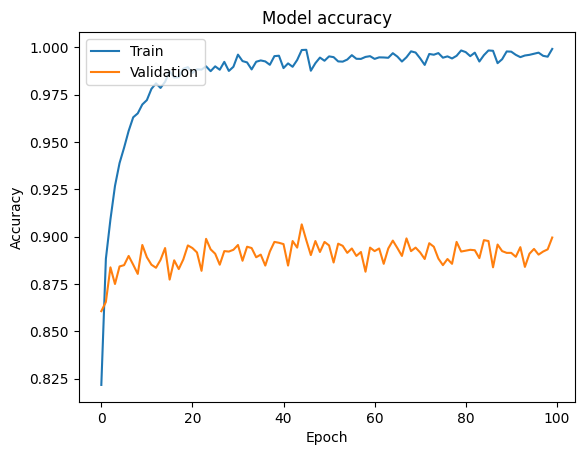

In [ ]:
import matplotlib.pyplot as plt

# Plot the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Save the plot
plt.savefig('model_accuracy.png', dpi=300)  # Save with a resolution of 300 DPI
plt.show()


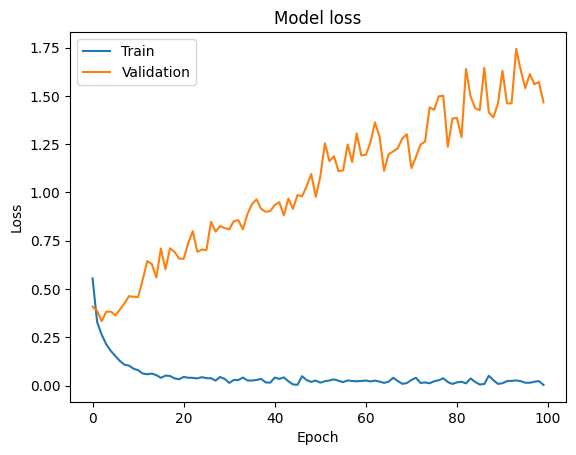

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.savefig('model_loss.png', dpi=300)
plt.show()

In [ ]:
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for i, (image_batch, label_batch) in enumerate(test_dataset):   # use dataset.unbatch() with repeat
    # append true labels
    y_true.append(label_batch)
    # compute predictions
    preds = efficientnet_model.predict(image_batch)
    # append predicted labels
    y_pred.append(np.argmax(preds, axis =  1))
    if i==300:
        break

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
correct_labels = np.argmax(correct_labels, axis=1)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━

In [ ]:
cm = confusion_matrix(correct_labels, predicted_labels)
cm

array([[ 983,    2,    7,   21,    0,    6,   29,    0,   28,    4],
       [   0, 1036,   15,    0,    0,   15,    0,    3,    0,    4],
       [   4,   29,  920,   24,    3,   25,   47,    9,   11,    2],
       [  12,    0,    8,  711,   16,   25,   28,   12,   69,    2],
       [   0,    0,    0,   17,  838,    0,    7,   15,    4,    0],
       [   9,   29,    8,    4,    0,  638,   12,    0,   16,    4],
       [  12,    0,   51,   53,   14,    9,  741,   11,    0,    0],
       [   0,    0,   10,   12,   39,    2,    5, 1020,    2,    0],
       [  16,    7,    7,   68,    2,   17,    5,    0,  765,    5],
       [   6,   16,    0,    0,    0,    2,    0,    0,   11, 1013]])

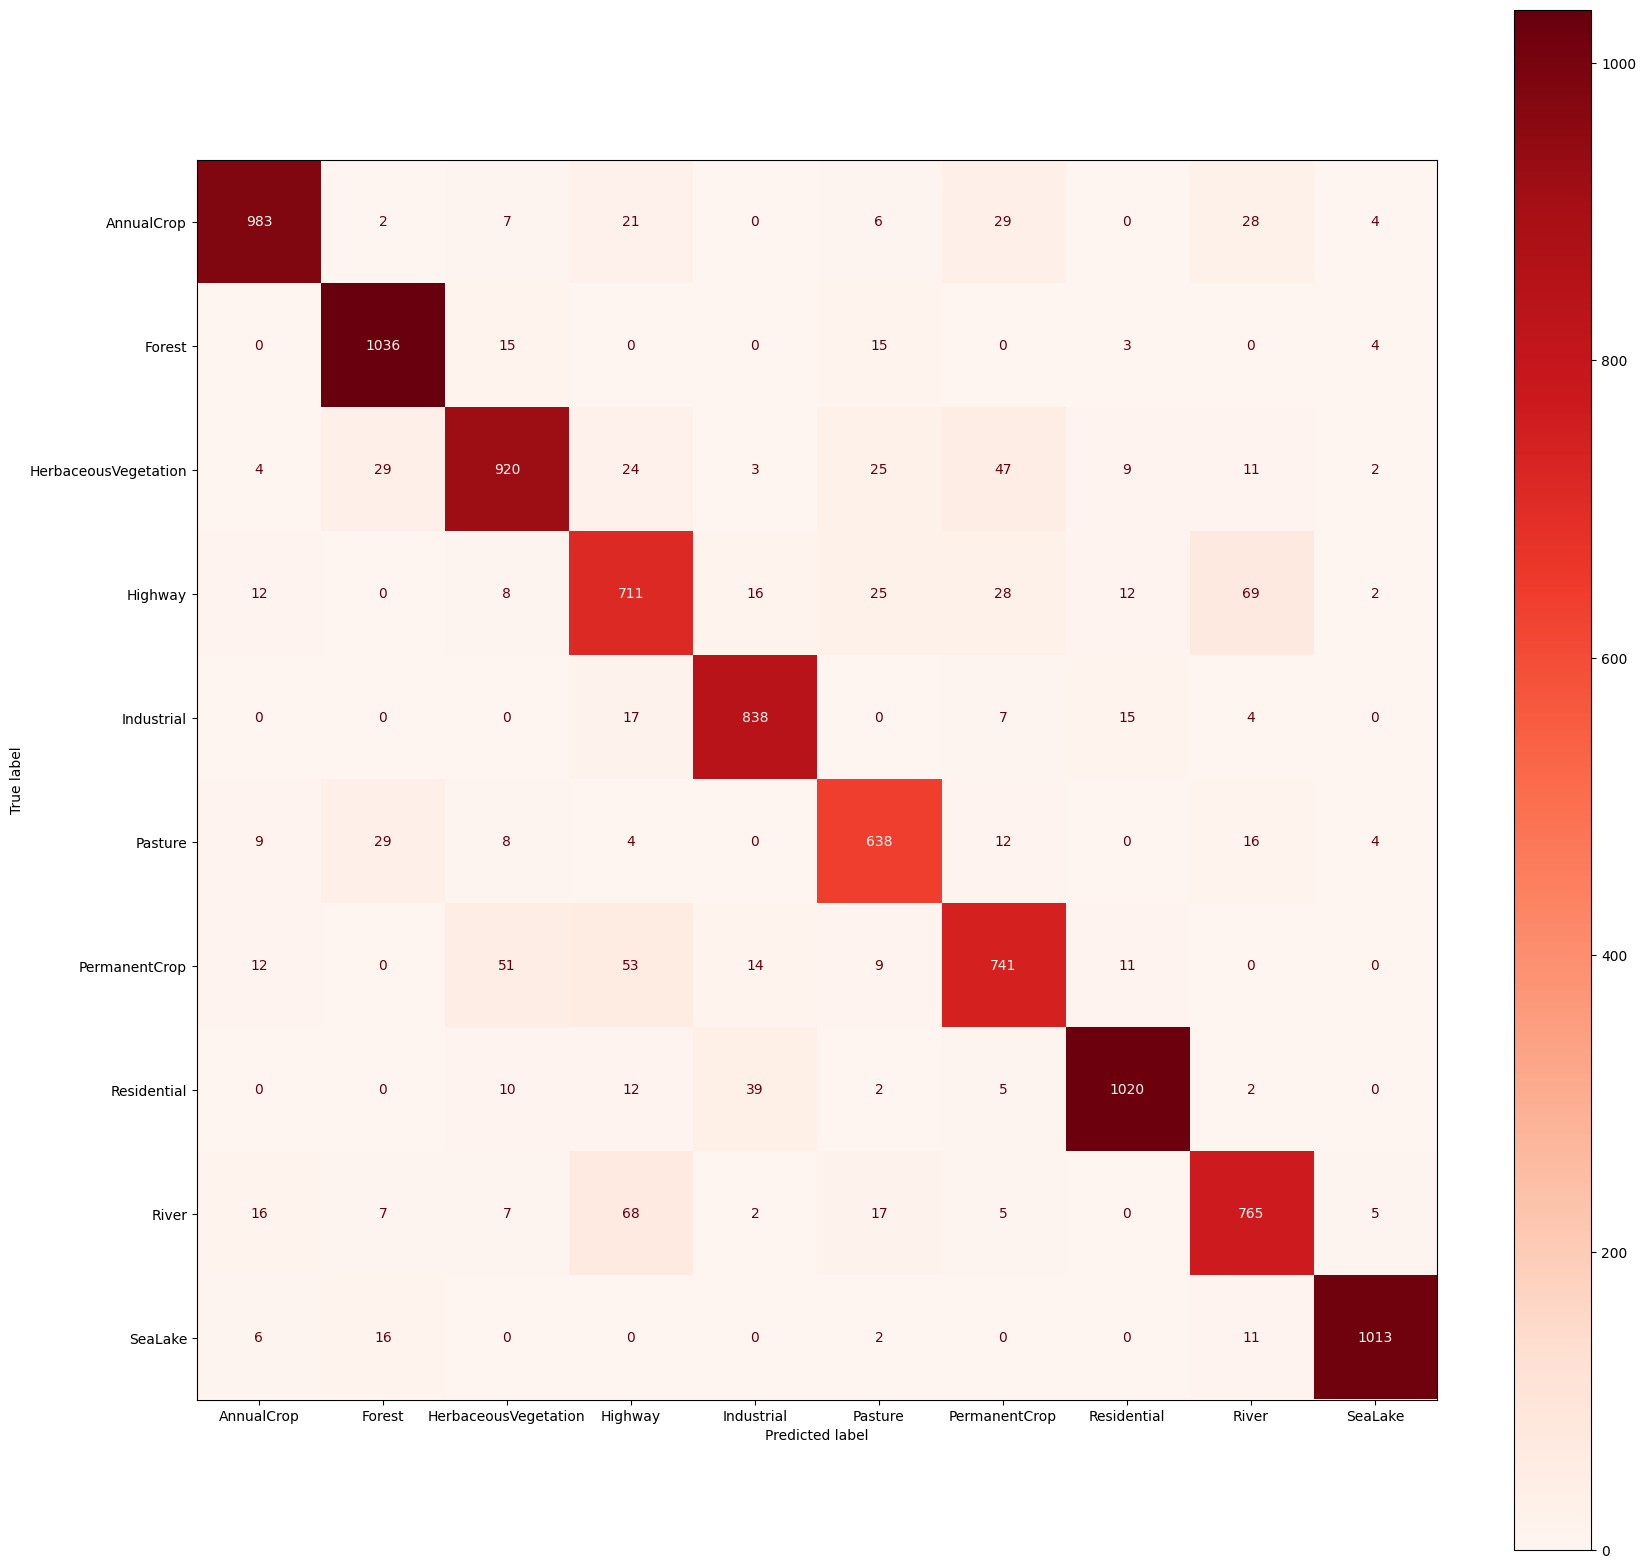

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_dataset.class_indices)
disp.plot(ax=ax, cmap='Reds')

# Save the plot
plt.savefig('confusion_matrix.png', dpi=300)  # Save the figure before showing it
plt.show()

In [ ]:
report = classification_report(correct_labels, predicted_labels, target_names=class_names)
print(report)

                      precision    recall  f1-score   support

          AnnualCrop       0.94      0.91      0.93      1080
              Forest       0.93      0.97      0.95      1073
HerbaceousVegetation       0.90      0.86      0.88      1074
             Highway       0.78      0.81      0.79       883
          Industrial       0.92      0.95      0.93       881
             Pasture       0.86      0.89      0.87       720
       PermanentCrop       0.85      0.83      0.84       891
         Residential       0.95      0.94      0.94      1090
               River       0.84      0.86      0.85       892
             SeaLake       0.98      0.97      0.97      1048

            accuracy                           0.90      9632
           macro avg       0.90      0.90      0.90      9632
        weighted avg       0.90      0.90      0.90      9632



In [ ]:
efficientnet_model.save('resnet50_model.h5')

# Get the size of the saved model file in bytes
model_size = os.path.getsize('resnet50_model.h5')

print(f"Model Size: {model_size} bytes")
print(f"Model Size: {model_size / (1024 * 1024)} MB")  # Convert to megabytes

Model Size: 55799240 bytes
Model Size: 53.21430206298828 MB


In [ ]:
start_time = time.time()
predictions = efficientnet_model.predict(test_dataset)
end_time = time.time()

inference_time = end_time - start_time

print(f"Inference Time: {inference_time} seconds")

135/135 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step
Inference Time: 20.551910161972046 seconds


In [ ]:
efficientnet_model.summary()

# Get the total number of trainable parameters
total_params = efficientnet_model.count_params()
print(f"Total Trainable Parameters: {total_params}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ (None, 2, 2, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,732,192 (52.38 MB)

 Trainable params: 2,231,562 (8.51 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

 Optimizer params: 4,463,126 (17.03 MB)

Total Trainable Parameters: 9269066


In [ ]:
training_accuracy = history.history['accuracy'][-1]  # Accuracy of the last epoch
validation_accuracy = history.history['val_accuracy'][-1]  # Validation accuracy of the last epoch

print(f"Training Accuracy: {training_accuracy}")
print(f"Validation Accuracy: {validation_accuracy}")

Training Accuracy: 0.9991319179534912
Validation Accuracy: 0.8995370268821716


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get predictions for the validation set
y_pred = efficientnet_model.predict(test_dataset)
y_pred = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Get true labels for the validation set
y_true = test_dataset.classes  # Assuming test_dataset has a 'classes' attribute

# Calculate metrics
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step
Precision: 0.09553002357093521
Recall: 0.09513888888888888
F1 Score: 0.09530918074133217
